In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [89]:
incidents = pd.read_csv('../SF_Crime_Project/data/SFPD_Incidents.csv', sep=',')
incidents.tail()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
137462,70477746,ASSAULT,AGGRAVATED ASSAULT WITH A GUN,Wednesday,06/10/2015,11:00,SOUTHERN,NONE,5TH ST / HARRISON ST,-122.401846,37.779032,"(37.7790324136251, -122.401846367522)",7047774604011
137463,81076498,MISSING PERSON,FOUND PERSON,Monday,03/28/2016,14:00,TARAVAL,NONE,2300 Block of 24TH AV,-122.481183,37.743727,"(37.7437268170337, -122.48118317163)",8107649875000
137464,961392021,MISSING PERSON,FOUND PERSON,Wednesday,02/24/2016,00:01,SOUTHERN,EXCEPTIONAL CLEARANCE,800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",96139202175000
137465,961392021,NON-CRIMINAL,CASE CLOSURE,Wednesday,02/24/2016,00:01,SOUTHERN,EXCEPTIONAL CLEARANCE,800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",96139202175030
137466,981021761,WARRANTS,WARRANT ARREST,Wednesday,09/30/2015,23:53,NORTHERN,"ARREST, BOOKED",OLIVE ST / VANNESS AV,-122.421097,37.784294,"(37.7842937802977, -122.421096796936)",98102176163010


In [90]:
incidents[incidents['IncidntNum']==70477746].X

137462   -122.401846
Name: X, dtype: float64

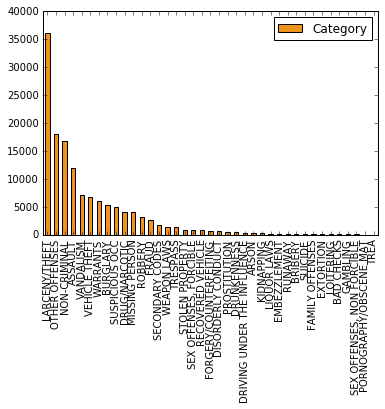

In [91]:
incidents.Category.value_counts().plot(kind='bar', color = '#F1911E')
ax1.set_ylabel("Category")
ax1.set_xlabel("DayOfWeek")
List_of_Categories = {'Category': ['LARCENY/THEFT', 'OTHER OFFENCES','NON-CRIMINAL','ASSAULT']}
plt.legend(loc='List_of_Categories')

In [92]:
incidents.Resolution.value_counts()

NONE                                      96679
ARREST, BOOKED                            36976
UNFOUNDED                                  1523
JUVENILE BOOKED                             867
ARREST, CITED                               593
EXCEPTIONAL CLEARANCE                       533
CLEARED-CONTACT JUVENILE FOR MORE INFO      132
PSYCHOPATHIC CASE                            77
LOCATED                                      60
NOT PROSECUTED                               21
JUVENILE DIVERTED                             5
COMPLAINANT REFUSES TO PROSECUTE              1
Name: Resolution, dtype: int64

In [95]:
#Null Hypothesis
96679/137467.

0.7032887893094343

In [42]:
incidents.shape

(137467, 13)

In [43]:
incidents.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    1
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

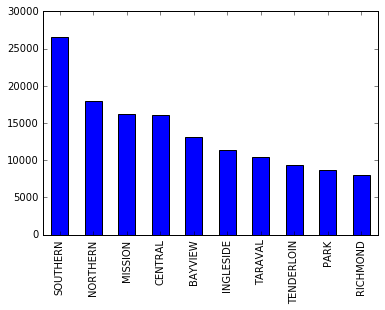

In [96]:
incidents['PdDistrict'].value_counts().plot(kind='bar', color= 'blue')

In [97]:
incidents.groupby('PdDistrict')['DayOfWeek'].value_counts()

PdDistrict  DayOfWeek
BAYVIEW     Monday       1961
            Thursday     1945
            Friday       1939
            Tuesday      1872
            Wednesday    1838
            Saturday     1780
            Sunday       1719
CENTRAL     Saturday     2639
            Friday       2500
            Wednesday    2227
            Sunday       2215
            Thursday     2198
            Monday       2179
            Tuesday      2143
INGLESIDE   Friday       1738
            Tuesday      1673
            Wednesday    1654
            Thursday     1636
            Saturday     1584
            Monday       1544
            Sunday       1530
MISSION     Friday       2393
            Wednesday    2389
            Sunday       2366
            Thursday     2312
            Saturday     2302
            Tuesday      2299
            Monday       2185
NORTHERN    Saturday     2786
            Friday       2766
                         ... 
PARK        Thursday     1189
            Sunday

In [98]:
raw_data = {'DayOfWeek': ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
        'CENTRAL': [2639, 2215, 2179, 2143, 2227, 2198, 2500],
        'MISSION': [2302, 2366, 2185, 2299, 2389, 2312, 2393],
        'SOUTHERN': [4074, 3500, 3571, 3595, 3769, 3803, 4178]}
df = pd.DataFrame(raw_data, columns = ['DayOfWeek', 'CENTRAL', 'MISSION', 'SOUTHERN'])
df

,DayOfWeek,CENTRAL,MISSION,SOUTHERN
0,Saturday,2639,2302,4074
1,Sunday,2215,2366,3500
2,Monday,2179,2185,3571
3,Tuesday,2143,2299,3595
4,Wednesday,2227,2389,3769
5,Thursday,2198,2312,3803
6,Friday,2500,2393,4178


(0.625, 8.125)

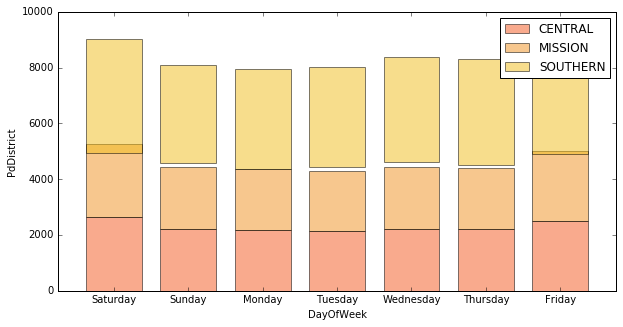

In [99]:

f, ax1 = plt.subplots(1, figsize=(10,5))
bar_width = 0.75
bar_l = [i+1 for i in range(len(df['CENTRAL']))] 
tick_pos = [i+(bar_width/2) for i in bar_l] 
ax1.bar(bar_l, 
        
        df['CENTRAL'], 
        width=bar_width,
        label='CENTRAL', 
        alpha=0.5, 
        color='#F4561D')


ax1.bar(bar_l, 
        
        df['CENTRAL'], 
        width=bar_width,
        bottom=df['CENTRAL'], 
        label='MISSION', 
        alpha=0.5, 
        color='#F1911E')


ax1.bar(bar_l, 
        
        df['SOUTHERN'], 
        width=bar_width,
        bottom=[i+j for i,j in zip(df['CENTRAL'],df['MISSION'])], 
        label='SOUTHERN', 
        alpha=0.5, 
        color='#F1BD1A')


plt.xticks(tick_pos, df['DayOfWeek'])


ax1.set_ylabel("PdDistrict")
ax1.set_xlabel("DayOfWeek")
plt.legend(loc='PdDistrict')


plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])

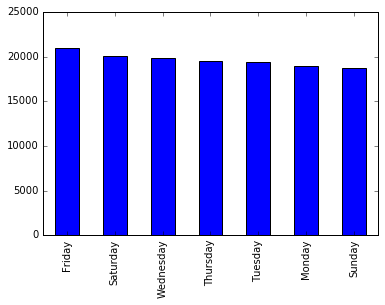

In [100]:
#This one does not tell me much
incidents['DayOfWeek'].value_counts().plot(kind='bar', color= 'blue')

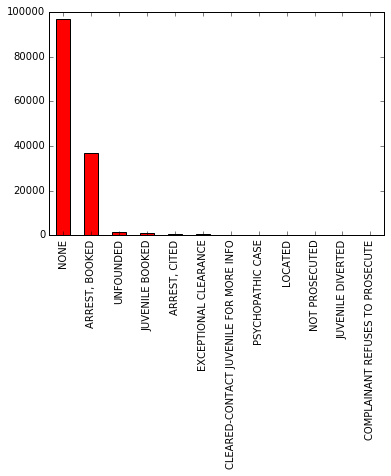

In [101]:
#Most of the crime is unresolved
incidents['Resolution'].value_counts().plot(kind='bar', color= 'red')

In [102]:
incidents['Date'] = pd.to_datetime(incidents['Date'])
# incidents.set_index('Date', inplace=True)
incidents.index = incidents['Date']

incidents['Year'] = incidents.index.year
incidents['Month'] = incidents.index.month
incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Year,Month
Date,,,,,,,,,,,,,,,
2015-07-09,110239385,"SEX OFFENSES, FORCIBLE",CHILD ABUSE SEXUAL,Thursday,2015-07-09,13:50,NORTHERN,"ARREST, BOOKED",400 Block of MCALLISTER ST,-122.419448,37.780209,"(37.7802091894281, -122.419448185224)",11023938514015,2015,7
2015-07-09,110239385,ASSAULT,CHILD ABUSE (PHYSICAL),Thursday,2015-07-09,13:50,NORTHERN,"ARREST, BOOKED",400 Block of MCALLISTER ST,-122.419448,37.780209,"(37.7802091894281, -122.419448185224)",11023938515015,2015,7
2015-07-09,110239385,WARRANTS,WARRANT ARREST,Thursday,2015-07-09,13:50,NORTHERN,"ARREST, BOOKED",400 Block of MCALLISTER ST,-122.419448,37.780209,"(37.7802091894281, -122.419448185224)",11023938563010,2015,7
2015-07-09,110239385,NON-CRIMINAL,CASE CLOSURE,Thursday,2015-07-09,13:50,NORTHERN,"ARREST, BOOKED",400 Block of MCALLISTER ST,-122.419448,37.780209,"(37.7802091894281, -122.419448185224)",11023938575030,2015,7
2015-10-02,111008842,ROBBERY,ATTEMPTED ROBBERY WITH BODILY FORCE,Friday,2015-10-02,22:21,TARAVAL,"ARREST, BOOKED",ALEMANY BL / KEMPTON AV,-122.468426,37.710955,"(37.7109549221546, -122.468425552228)",11100884203474,2015,10


In [51]:
incidents['2015-06-23'].head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Year,Month
Date,,,,,,,,,,,,,,,
2015-06-23,150544984,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,2015-06-23,21:30,BAYVIEW,NONE,WILLIAMS AV / 3RD ST,-122.392625,37.729280,"(37.7292804432175, -122.392625489263)",15054498465016,2015,6
2015-06-23,150545073,SECONDARY CODES,DOMESTIC VIOLENCE,Tuesday,2015-06-23,20:47,BAYVIEW,NONE,1000 Block of CONNECTICUT ST,-122.397202,37.753535,"(37.7535351242762, -122.397201937993)",15054507315200,2015,6
2015-06-23,150545073,ASSAULT,THREATS AGAINST LIFE,Tuesday,2015-06-23,20:47,BAYVIEW,NONE,1000 Block of CONNECTICUT ST,-122.397202,37.753535,"(37.7535351242762, -122.397201937993)",15054507319057,2015,6
2015-06-23,150545443,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Tuesday,2015-06-23,00:01,SOUTHERN,"ARREST, BOOKED",6TH ST / MARKET ST,-122.410294,37.782231,"(37.7822305870036, -122.41029351969)",15054544316650,2015,6
2015-06-23,150545443,LARCENY/THEFT,"LOST PROPERTY, PETTY THEFT",Tuesday,2015-06-23,00:01,SOUTHERN,"ARREST, BOOKED",6TH ST / MARKET ST,-122.410294,37.782231,"(37.7822305870036, -122.41029351969)",15054544327090,2015,6


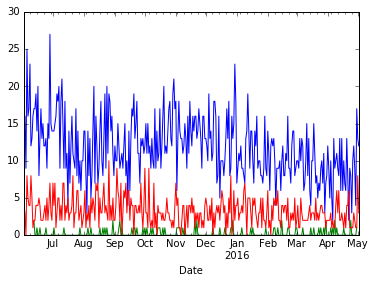

In [103]:
# incidents.Descript.unique()
incidents[incidents.Descript=='STOLEN AUTOMOBILE'].resample('1D', how='count')['IncidntNum'].plot()#in blue
incidents[incidents.Descript=='ASSAULT'].resample('1D', how='count')['IncidntNum'].plot() #in red
incidents[incidents.Descript=='DOMESTIC VIOLENCE'].resample('1D', how='count')['IncidntNum'].plot() #in green


In [104]:
DayofWeek_dummies=pd.get_dummies(incidents.DayOfWeek, prefix ='DOW')
DayofWeek_dummies.drop(DayofWeek_dummies.columns[0], axis=1, inplace=True)

Category_dummies=pd.get_dummies(incidents.Category, prefix ='C')
Category_dummies.drop(Category_dummies.columns[0], axis=1, inplace=True)

Descript_dummies=pd.get_dummies(incidents.Descript, prefix ='Descript')
Descript_dummies.drop(Descript_dummies.columns[0], axis=1, inplace=True)

PdDistrict_dummies=pd.get_dummies(incidents.PdDistrict, prefix ='PdDistrict')
PdDistrict_dummies.drop(PdDistrict_dummies.columns[0], axis=1, inplace=True)

incidents1 = pd.concat([DayofWeek_dummies, Category_dummies, Descript_dummies, PdDistrict_dummies], axis=1)
incidents1.head()





,DOW_Monday,DOW_Saturday,DOW_Sunday,DOW_Thursday,DOW_Tuesday,DOW_Wednesday,C_ASSAULT,C_BAD CHECKS,C_BRIBERY,C_BURGLARY,...,Descript_WILLFUL CRUELTY TO CHILD,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-09,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2015-07-09,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2015-07-09,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2015-07-09,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2015-10-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [63]:
incidents['Resolution']

0                ARREST, BOOKED
1                ARREST, BOOKED
2                ARREST, BOOKED
3                ARREST, BOOKED
4                ARREST, BOOKED
5                ARREST, BOOKED
6                ARREST, BOOKED
7                ARREST, BOOKED
8                ARREST, BOOKED
9                ARREST, BOOKED
10               ARREST, BOOKED
11               ARREST, BOOKED
12        EXCEPTIONAL CLEARANCE
13        EXCEPTIONAL CLEARANCE
14               ARREST, BOOKED
15               ARREST, BOOKED
16               ARREST, BOOKED
17               ARREST, BOOKED
18               ARREST, BOOKED
19               ARREST, BOOKED
20               ARREST, BOOKED
21               ARREST, BOOKED
22               ARREST, BOOKED
23               ARREST, BOOKED
24               ARREST, BOOKED
25               ARREST, BOOKED
26               ARREST, BOOKED
27               ARREST, BOOKED
28                         NONE
29                         NONE
                  ...          
137437  

In [105]:
#map resolution
all_else = ['UNFOUNDED','JUVENILE BOOKED','ARREST, CITED','EXCEPTIONAL CLEARANCE','CLEARED-CONTACT JUVENILE FOR MORE INFO','PSYCHOPATHIC CASE','LOCATED','NOT PROSECUTED','JUVENILE DIVERTED','COMPLAINANT REFUSES TO PROSECUTE']
all_else = {k: 2 for k in all_else}

In [106]:
all_else['NONE'] = 0

In [107]:
all_else['ARREST, BOOKED'] = 1

In [108]:
#map resolution
incidents['Resolution_new'] = incidents['Resolution'].map(all_else)

In [109]:
incidents[incidents['Resolution_new'] == 0].head(12)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Year,Month,Resolution_new
Date,,,,,,,,,,,,,,,,
2015-07-18,126101083,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Saturday,2015-07-18,11:35,PARK,NONE,2200 Block of OFARRELL ST,-122.441325,37.782291,"(37.7822914617391, -122.441324830173)",12610108306372,2015,7,0
2015-10-28,130088372,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,2015-10-28,12:30,TARAVAL,NONE,2400 Block of OCEAN AV,-122.471004,37.730591,"(37.7305910212673, -122.471004410599)",13008837207021,2015,10,0
2016-03-26,130190030,OTHER OFFENSES,LOST/STOLEN LICENSE PLATE,Saturday,2016-03-26,14:03,PARK,NONE,500 Block of PARNASSUS AV,-122.458221,37.763312,"(37.7633123961354, -122.458220811697)",13019003071010,2016,3,0
2016-03-26,130190030,NON-CRIMINAL,"LICENSE PLATE, RECOVERED",Saturday,2016-03-26,14:03,PARK,NONE,500 Block of PARNASSUS AV,-122.458221,37.763312,"(37.7633123961354, -122.458220811697)",13019003071012,2016,3,0
2015-08-15,15013361,NON-CRIMINAL,FOUND PROPERTY,Saturday,2015-08-15,20:53,SOUTHERN,NONE,600 Block of 3RD ST,-122.393461,37.779498,"(37.7794975702131, -122.393460953167)",1501336172000,2015,8,0
2016-03-10,150215981,NON-CRIMINAL,TRAFFIC ACCIDENT,Thursday,2016-03-10,17:12,MISSION,NONE,2500 Block of 23RD ST,-122.405248,37.754405,"(37.754404748573, -122.405248327082)",15021598168050,2016,3,0
2015-09-16,150271080,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Wednesday,2015-09-16,15:00,SOUTHERN,NONE,MARKET ST / 7TH ST,-122.412515,37.780478,"(37.7804777480508, -122.412515341356)",15027108006374,2015,9,0
2015-10-15,150284544,LARCENY/THEFT,GRAND THEFT FROM A BUILDING,Thursday,2015-10-15,00:01,SOUTHERN,NONE,100 Block of OTIS ST,-122.420303,37.770897,"(37.770896885856, -122.420303482492)",15028454406304,2015,10,0
2015-07-22,150313165,OTHER OFFENSES,FALSE PERSONATION,Wednesday,2015-07-22,00:01,NORTHERN,NONE,2300 Block of PACIFIC AV,-122.433916,37.793396,"(37.7933961776201, -122.433915817274)",15031316509027,2015,7,0


In [110]:
incidents1['resolution'] = incidents["Resolution_new"]

In [111]:
incidents1.columns.tolist().index('resolution')

770

In [112]:
feature_columns = incidents1.columns.tolist()[:770:]

In [113]:
x = incidents1[feature_columns]
y = incidents1.resolution

In [114]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y)

In [115]:
from sklearn.ensemble import RandomForestClassifier 
rfreg = RandomForestClassifier()
rfreg.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [77]:
z=rfreg.predict(x_test)

In [78]:
print len(y_test)


34367


In [79]:
from sklearn import metrics
print metrics.confusion_matrix(y_test, z)

[[22551  1423   113]
 [ 2320  6969    69]
 [  533   293    96]]


In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, z)

0.86175691797363752

In [81]:
print len(z), len(y_test)

34367 34367


In [116]:
new_df = pd.concat([incidents1, incidents])

In [83]:
new_df.head()

,Address,C_ASSAULT,C_BAD CHECKS,C_BRIBERY,C_BURGLARY,C_DISORDERLY CONDUCT,C_DRIVING UNDER THE INFLUENCE,C_DRUG/NARCOTIC,C_DRUNKENNESS,C_EMBEZZLEMENT,...,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,PdId,Resolution,Resolution_new,Time,X,Y,resolution
0,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,NaN,1,0,0,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1
3,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1
4,NaN,0,0,0,0,0,0,0,0,0,...,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [84]:
incidents1.columns

Index([u'DOW_Monday', u'DOW_Saturday', u'DOW_Sunday', u'DOW_Thursday',
       u'DOW_Tuesday', u'DOW_Wednesday', u'C_ASSAULT', u'C_BAD CHECKS',
       u'C_BRIBERY', u'C_BURGLARY',
       ...
       u'PdDistrict_CENTRAL', u'PdDistrict_INGLESIDE', u'PdDistrict_MISSION',
       u'PdDistrict_NORTHERN', u'PdDistrict_PARK', u'PdDistrict_RICHMOND',
       u'PdDistrict_SOUTHERN', u'PdDistrict_TARAVAL', u'PdDistrict_TENDERLOIN',
       u'resolution'],
      dtype='object', length=771)

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
logreg = LogisticRegression(C=1e9)
X = incidents1.drop('resolution', axis=1)
y = incidents1.resolution
cross_val_score(logreg, X, y, cv=5, scoring='accuracy') #better than the null
logreg.fit(X, y)
resolution_pred = logreg.predict(X)

In [122]:
logreg.score(x_test, y_test) #accuracy score

0.87435621380975936

In [101]:
print resolution_pred

[0 1 1 ..., 0 2 1]


In [109]:
x.columns

Index([u'DOW_Monday', u'DOW_Saturday', u'DOW_Sunday', u'DOW_Thursday',
       u'DOW_Tuesday', u'DOW_Wednesday', u'C_ASSAULT', u'C_BAD CHECKS',
       u'C_BRIBERY', u'C_BURGLARY',
       ...
       u'Descript_WILLFUL CRUELTY TO CHILD', u'PdDistrict_CENTRAL',
       u'PdDistrict_INGLESIDE', u'PdDistrict_MISSION', u'PdDistrict_NORTHERN',
       u'PdDistrict_PARK', u'PdDistrict_RICHMOND', u'PdDistrict_SOUTHERN',
       u'PdDistrict_TARAVAL', u'PdDistrict_TENDERLOIN'],
      dtype='object', length=770)

In [108]:
print logreg.predict_proba (X)

[[ 0.57166118  0.31875271  0.10958611]
 [ 0.38964686  0.5843314   0.02602174]
 [ 0.04921647  0.93564312  0.01514041]
 ..., 
 [ 0.79852214  0.04772635  0.15375151]
 [ 0.35723082  0.13176649  0.51100268]
 [ 0.05393111  0.93077365  0.01529524]]


In [120]:
incidents1['proba'] = logreg.predict_proba(X).tolist()

In [122]:
incidents1.head()

,DOW_Monday,DOW_Saturday,DOW_Sunday,DOW_Thursday,DOW_Tuesday,DOW_Wednesday,C_ASSAULT,C_BAD CHECKS,C_BRIBERY,C_BURGLARY,...,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,resolution,proba
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,"[0.571661181932, 0.318752712953, 0.109586105115]"
1,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,"[0.389646858758, 0.584331403476, 0.0260217377658]"
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,"[0.049216468001, 0.935643118216, 0.0151404137826]"
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,"[0.400245690586, 0.127608423913, 0.472145885502]"
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,"[0.80263833197, 0.162265238553, 0.0350964294772]"


In [111]:
print logreg.classes_

[0 1 2]


In [90]:
x.columns

Index([u'DOW_Monday', u'DOW_Saturday', u'DOW_Sunday', u'DOW_Thursday',
       u'DOW_Tuesday', u'DOW_Wednesday', u'C_ASSAULT', u'C_BAD CHECKS',
       u'C_BRIBERY', u'C_BURGLARY',
       ...
       u'Descript_WILLFUL CRUELTY TO CHILD', u'PdDistrict_CENTRAL',
       u'PdDistrict_INGLESIDE', u'PdDistrict_MISSION', u'PdDistrict_NORTHERN',
       u'PdDistrict_PARK', u'PdDistrict_RICHMOND', u'PdDistrict_SOUTHERN',
       u'PdDistrict_TARAVAL', u'PdDistrict_TENDERLOIN'],
      dtype='object', length=770)

In [91]:
X.loc[0]

DOW_Monday                                                          0
DOW_Saturday                                                        0
DOW_Sunday                                                          0
DOW_Thursday                                                        1
DOW_Tuesday                                                         0
DOW_Wednesday                                                       0
C_ASSAULT                                                           0
C_BAD CHECKS                                                        0
C_BRIBERY                                                           0
C_BURGLARY                                                          0
C_DISORDERLY CONDUCT                                                0
C_DRIVING UNDER THE INFLUENCE                                       0
C_DRUG/NARCOTIC                                                     0
C_DRUNKENNESS                                                       0
C_EMBEZZLEMENT      